<a href="https://colab.research.google.com/github/DeshpandeDhruv/InningSight/blob/main/1_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("hello")

hello


In [2]:
import numpy as np
import pandas as pd

In [3]:
deliveries=pd.read_csv('deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [4]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [5]:
matches=pd.read_csv('matches.csv')
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
matches.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
matches.shape

(756, 18)

In [8]:
deliveries.shape

(124022, 21)

In [9]:
# har match me kitna score hua in each inning vo nikal lete hai pehle
total_score_df=deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [10]:
total_score_df.head()

,match_id,inning,total_runs
0,1,1,207.0
1,1,2,172.0
2,2,1,184.0
3,2,2,187.0
4,3,1,183.0


In [11]:
#second inning wala hata do
total_score_df=total_score_df[total_score_df['inning']==1]
total_score_df.head()

,match_id,inning,total_runs
0,1,1,207.0
2,2,1,184.0
4,3,1,183.0
6,4,1,163.0
8,5,1,157.0


In [12]:
#isko merger karna hai ddeliveries df
match_df=matches.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207.0
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184.0
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183.0
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157.0


In [13]:
#8 hi team ko rakhna hai , deccan chargers to be replaced with srh, delhi daredevils to be replaced with dc
match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

In [14]:
match_df['team1']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')


In [15]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Pune Warriors'], dtype=object)

In [16]:
#filter out the teams
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [17]:
match_df['team2'].unique()

array(['Royal Challengers Bangalore', 'Delhi Capitals', 'Mumbai Indians',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Sunrisers Hyderabad',
       'Rajasthan Royals', 'Chennai Super Kings'], dtype=object)

In [18]:
match_df.shape

(436, 20)

In [19]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157.0
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178.0
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148.0
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158.0


In [20]:
#dls wale bhi hata do
match_df['dl_applied'].value_counts()

,count
dl_applied,
0,427
1,9


In [21]:
match_df=match_df[match_df['dl_applied']==0]

In [22]:
match_df['dl_applied'].value_counts()

,count
dl_applied,
0,427


In [23]:
match_df=match_df[['match_id','city','total_runs']]

In [24]:
match_df.head()

,match_id,city,total_runs
0,1,Hyderabad,207.0
4,5,Bangalore,157.0
6,7,Mumbai,178.0
7,8,Indore,148.0
9,10,Mumbai,158.0


In [25]:
delivery_df=match_df.merge(deliveries,on='match_id')

In [26]:
delivery_df.head(-1)

,match_id,city,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,non_striker,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102037,523,Delhi,106.0,1,Delhi Daredevils,Rajasthan Royals,12.0,7.0,Yuvraj Singh,JP Duminy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
102038,523,Delhi,106.0,1,Delhi Daredevils,Rajasthan Royals,13.0,1.0,JP Duminy,Yuvraj Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
102039,523,Delhi,106.0,1,Delhi Daredevils,Rajasthan Royals,13.0,2.0,JP Duminy,Yuvraj Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
102040,523,Delhi,106.0,1,Delhi Daredevils,Rajasthan Royals,13.0,3.0,JP Duminy,Yuvraj Singh,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN


In [27]:
#2nd inning wale nahi chahiye
delivery_df=delivery_df[delivery_df['inning']==1]
delivery_df.tail()

,match_id,city,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,non_striker,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
102038,523,Delhi,106.0,1,Delhi Daredevils,Rajasthan Royals,13.0,1.0,JP Duminy,Yuvraj Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
102039,523,Delhi,106.0,1,Delhi Daredevils,Rajasthan Royals,13.0,2.0,JP Duminy,Yuvraj Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
102040,523,Delhi,106.0,1,Delhi Daredevils,Rajasthan Royals,13.0,3.0,JP Duminy,Yuvraj Singh,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN
102041,523,Delhi,106.0,1,Delhi Daredevils,Rajasthan Royals,13.0,4.0,JP Duminy,Yuvraj Singh,...,0.0,0.0,0.0,0.0,6.0,0.0,6.0,NaN,NaN,NaN
102042,523,Delhi,106.0,1,D,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#find the score after each ball

delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()
delivery_df.head(5)

,match_id,city,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,non_striker,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
0,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
1,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
2,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,...,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN,4.0
3,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,4.0
4,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,...,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN,6.0


In [29]:
#wickets kitne gire after each ball

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
delivery_df['wickets_fallen'] = delivery_df.groupby('match_id')['player_dismissed'].cumsum()



In [30]:
delivery_df.head(15)

,match_id,city,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,non_striker,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,wickets_fallen
0,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,...,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0.0,0
1,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,...,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0.0,0
2,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,...,0.0,0.0,4.0,0.0,4.0,0,NaN,NaN,4.0,0
3,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,...,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,4.0,0
4,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,...,0.0,0.0,0.0,2.0,2.0,0,NaN,NaN,6.0,0
5,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,6.0,S Dhawan,DA Warner,...,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,6.0,0
6,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,7.0,S Dhawan,DA Warner,...,0.0,0.0,0.0,1.0,1.0,0,NaN,NaN,7.0,0
7,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2.0,1.0,S Dhawan,DA Warner,...,0.0,0.0,1.0,0.0,1.0,0,NaN,NaN,8.0,0
8,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2.0,2.0,DA Warner,S Dhawan,...,0.0,0.0,4.0,0.0,4.0,0,NaN,NaN,12.0,0
9,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2.0,3.0,DA Warner,S Dhawan,...,1.0,0.0,0.0,1.0,1.0,0,NaN,NaN,13.0,0


In [31]:
#balls completed bhi nikalne hai
delivery_df['balls_completed']=((delivery_df['over']-1)*(6))+(delivery_df['ball'])
delivery_df['balls_completed'].head(10)

,balls_completed
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
5,6.0
6,7.0
7,7.0
8,8.0
9,9.0


In [32]:
#crr nikalna hai using runs scored and balls completed
delivery_df.head()
#delivery_df['crr']=delivery_df['runs']

,match_id,city,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,non_striker,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,wickets_fallen,balls_completed
0,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,...,0.0,0.0,0.0,0.0,0,NaN,NaN,0.0,0,1.0
1,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,...,0.0,0.0,0.0,0.0,0,NaN,NaN,0.0,0,2.0
2,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,...,0.0,4.0,0.0,4.0,0,NaN,NaN,4.0,0,3.0
3,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,...,0.0,0.0,0.0,0.0,0,NaN,NaN,4.0,0,4.0
4,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,...,0.0,0.0,2.0,2.0,0,NaN,NaN,6.0,0,5.0


In [33]:
delivery_df['crr']=((delivery_df['current_score'])*(6))/(delivery_df['balls_completed'])


In [34]:
delivery_df['crr'].head(16)

,crr
0,0.000000
1,0.000000
2,8.000000
3,6.000000
4,7.200000
5,6.000000
6,6.000000
7,6.857143
8,9.000000
9,8.666667


In [35]:
delivery_df.head()

,match_id,city,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,non_striker,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,wickets_fallen,balls_completed,crr
0,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,...,0.0,0.0,0.0,0,NaN,NaN,0.0,0,1.0,0.0
1,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,...,0.0,0.0,0.0,0,NaN,NaN,0.0,0,2.0,0.0
2,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,...,4.0,0.0,4.0,0,NaN,NaN,4.0,0,3.0,8.0
3,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,...,0.0,0.0,0.0,0,NaN,NaN,4.0,0,4.0,6.0
4,1,Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,...,0.0,2.0,2.0,0,NaN,NaN,6.0,0,5.0,7.2


In [36]:
extracted_df=delivery_df[['city','total_runs_x','batting_team','bowling_team','current_score','wickets_fallen','balls_completed','crr']]

In [37]:
extracted_df.head(18)

,city,total_runs_x,batting_team,bowling_team,current_score,wickets_fallen,balls_completed,crr
0,Hyderabad,207.0,Sunrisers Hyderabad,Royal Challengers Bangalore,0.0,0,1.0,0.000000
1,Hyderabad,207.0,Sunrisers Hyderabad,Royal Challengers Bangalore,0.0,0,2.0,0.000000
2,Hyderabad,207.0,Sunrisers Hyderabad,Royal Challengers Bangalore,4.0,0,3.0,8.000000
3,Hyderabad,207.0,Sunrisers Hyderabad,Royal Challengers Bangalore,4.0,0,4.0,6.000000
4,Hyderabad,207.0,Sunrisers Hyderabad,Royal Challengers Bangalore,6.0,0,5.0,7.200000
5,Hyderabad,207.0,Sunrisers Hyderabad,Royal Challengers Bangalore,6.0,0,6.0,6.000000
6,Hyderabad,207.0,Sunrisers Hyderabad,Royal Challengers Bangalore,7.0,0,7.0,6.000000
7,Hyderabad,207.0,Sunrisers Hyderabad,Royal Challengers Bangalore,8.0,0,7.0,6.857143
8,Hyderabad,207.0,Sunrisers Hyderabad,Royal Challengers Bangalore,12.0,0,8.0,9.000000
9,Hyderabad,207.0,Sunrisers Hyderabad,Royal Challengers Bangalore,13.0,0,9.0,8.666667


In [38]:
extracted_df.isnull().sum()

,0
city,868
total_runs_x,0
batting_team,0
bowling_team,1
current_score,1
wickets_fallen,0
balls_completed,1
crr,1


In [39]:
extracted_df = extracted_df.dropna(subset=['bowling_team', 'current_score', 'balls_completed', 'crr','city'])



In [40]:
extracted_df.isnull().sum()

,0
city,0
total_runs_x,0
batting_team,0
bowling_team,0
current_score,0
wickets_fallen,0
balls_completed,0
crr,0


In [41]:
extracted_df.shape

(51765, 8)

In [42]:
extracted_df.columns

Index(['city', 'total_runs_x', 'batting_team', 'bowling_team', 'current_score',
       'wickets_fallen', 'balls_completed', 'crr'],
      dtype='object')

In [43]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 7.7 MB/s eta 0:00:00


In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import keras_tuner as kt

In [45]:
categorical_features = ['city', 'batting_team', 'bowling_team']
numerical_features = ['current_score', 'wickets_fallen', 'balls_completed', 'crr']
target = 'total_runs_x'

X = extracted_df[categorical_features + numerical_features]
y = extracted_df[target]

In [46]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
    ('num', StandardScaler(), numerical_features)
])

In [47]:

import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
np.random.seed(42)

In [49]:
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
    ('num', StandardScaler(), numerical_features)
])

In [50]:
# Apply preprocessing to X, and get y
X_raw = extracted_df[categorical_features + numerical_features]
y_raw = extracted_df[target].values.reshape(-1, 1)

In [51]:
# Fit transformer and transform
X_transformed = preprocessor.fit_transform(X_raw)   # numpy array
print("Transformed feature shape:", X_transformed.shape)

Transformed feature shape: (51765, 49)


In [52]:
# Train aur test split kar do idhar
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y_raw, test_size=0.2, random_state=42
)

In [53]:
class ScratchMLP:
    def __init__(self, input_dim, hidden_layers=[64,32], output_dim=1, seed=42):
        np.random.seed(seed)
        # layer sizes list
        self.sizes = [input_dim] + hidden_layers + [output_dim]
        self.L = len(self.sizes) - 1  # number of weight layers
        # Xavier/Glorot init for weights, zeros for biases
        self.W = {}
        self.b = {}
        for i in range(1, len(self.sizes)):
            fan_in, fan_out = self.sizes[i-1], self.sizes[i]
            limit = np.sqrt(6 / (fan_in + fan_out))
            self.W[i] = np.random.uniform(-limit, limit, (fan_in, fan_out))
            self.b[i] = np.zeros((1, fan_out))

    @staticmethod
    def relu(Z):
        return np.maximum(0, Z)

    @staticmethod
    def relu_grad(Z):
        return (Z > 0).astype(float)

    def forward(self, X):
        """
        Forward pass. Returns caches needed for backprop.
        caches: dict of A0..AL and Z1..ZL
        """
        caches = {}
        caches["A0"] = X
        for i in range(1, self.L + 1):
            Z = caches[f"A{i-1}"].dot(self.W[i]) + self.b[i]  # (m, size)
            caches[f"Z{i}"] = Z
            # For last layer (output) use linear activation
            if i == self.L:
                caches[f"A{i}"] = Z
            else:
                caches[f"A{i}"] = self.relu(Z)
        return caches

    def compute_loss(self, Y_pred, Y_true):
        m = Y_true.shape[0]
        loss = np.mean((Y_pred - Y_true) ** 2)  # MSE
        return loss

    def backward(self, caches, Y_true):
        """
        Returns grads dict with dW and db for layers 1..L
        """
        grads = {}
        m = Y_true.shape[0]
        # dA for output layer (MSE): dL/dA = 2*(A_L - Y)/m ; but we'll incorporate 1/m in grads
        A_L = caches[f"A{self.L}"]  # predicted (m,1)
        dZ = (2.0 / m) * (A_L - Y_true)  # (m,1) linear output derivative
        for i in reversed(range(1, self.L + 1)):
            A_prev = caches[f"A{i-1}"]  # (m, size_prev)
            grads[f"dW{i}"] = A_prev.T.dot(dZ)  # (size_prev, size_curr)
            grads[f"db{i}"] = np.sum(dZ, axis=0, keepdims=True)  # (1, size_curr)
            if i > 1:
                dA_prev = dZ.dot(self.W[i].T)  # (m, size_prev)
                dZ = dA_prev * self.relu_grad(caches[f"Z{i-1}"])
        return grads

    def update_params(self, grads, lr=1e-3):
        for i in range(1, self.L + 1):
            self.W[i] -= lr * grads[f"dW{i}"]
            self.b[i] -= lr * grads[f"db{i}"]

    def predict(self, X):
        caches = self.forward(X)
        return caches[f"A{self.L}"]

    def fit(self, X, Y, epochs=400, batch_size=64, lr=1e-3, verbose=True, val_data=None):
        m = X.shape[0]
        history = {"loss": [], "val_loss": []}
        for epoch in range(1, epochs + 1):
            # shuffle
            perm = np.random.permutation(m)
            X_shuff = X[perm]
            Y_shuff = Y[perm]
            # mini-batch
            for start in range(0, m, batch_size):
                end = start + batch_size
                X_batch = X_shuff[start:end]
                Y_batch = Y_shuff[start:end]
                # forward ka hai ye
                caches = self.forward(X_batch)
                # backward ka hai ye
                grads = self.backward(caches, Y_batch)
                # update
                self.update_params(grads, lr)
            # epoch metrics
            train_pred = self.predict(X)
            train_loss = self.compute_loss(train_pred, Y)
            history["loss"].append(train_loss)
            if val_data is not None:
                X_val, Y_val = val_data
                val_pred = self.predict(X_val)
                val_loss = self.compute_loss(val_pred, Y_val)
                history["val_loss"].append(val_loss)
            if verbose and (epoch % 20 == 0 or epoch == 1):
                if val_data is not None:
                    print(f"Epoch {epoch}/{epochs} - train_loss: {train_loss:.4f} - val_loss: {val_loss:.4f}")
                else:
                    print(f"Epoch {epoch}/{epochs} - train_loss: {train_loss:.4f}")
        return history

# Instantiate, train and evaluate

input_dim = X_train.shape[1]
mlp = ScratchMLP(input_dim=input_dim, hidden_layers=[128, 64], output_dim=1, seed=42)

# Optionally create small validation split from train for monitoring
X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)

history = mlp.fit(
    X_train_sub, y_train_sub,
    epochs=300,
    batch_size=128,
    lr=0.001,
    verbose=True,
    val_data=(X_val_sub, y_val_sub)
)

Epoch 1/300 - train_loss: 336.8298 - val_loss: 330.4785
Epoch 20/300 - train_loss: 141.0002 - val_loss: 146.5374
Epoch 40/300 - train_loss: 114.9121 - val_loss: 125.9848
Epoch 60/300 - train_loss: 98.9285 - val_loss: 108.0617
Epoch 80/300 - train_loss: 77.1294 - val_loss: 91.6541
Epoch 100/300 - train_loss: 89.1723 - val_loss: 105.3783
Epoch 120/300 - train_loss: 135.9286 - val_loss: 150.7096
Epoch 140/300 - train_loss: 85.5799 - val_loss: 100.5685
Epoch 160/300 - train_loss: 67.5348 - val_loss: 80.0004
Epoch 180/300 - train_loss: 90.7486 - val_loss: 104.2364
Epoch 200/300 - train_loss: 53.9729 - val_loss: 69.4280
Epoch 220/300 - train_loss: 53.8981 - val_loss: 67.8276
Epoch 240/300 - train_loss: 51.8210 - val_loss: 71.4122
Epoch 260/300 - train_loss: 48.7815 - val_loss: 63.9757
Epoch 280/300 - train_loss: 65.2437 - val_loss: 79.7153
Epoch 300/300 - train_loss: 52.9697 - val_loss: 67.9877


In [54]:
# Predictions and metrics
y_pred_test = mlp.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print("\nTest MAE:", round(mae, 3))
print("Test R2:", round(r2, 3))


Test MAE: 4.769
Test R2: 0.911


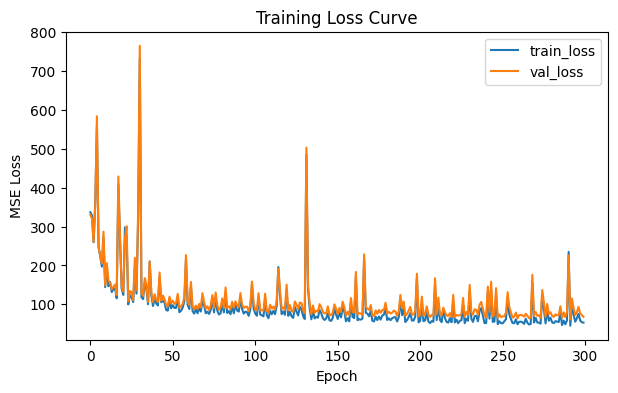

In [55]:
plt.figure(figsize=(7,4))
plt.plot(history["loss"], label="train_loss")
if len(history["val_loss"])>0:
    plt.plot(history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Training Loss Curve")
plt.show()

In [ ]:
#MAE:4.76
#R2 SCORE: 0.91